## **Imports**

In [128]:
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.feature_extraction.text import *

## **Προεπεξεργασία/Καθάρισμα Δεδομένων**

In [42]:
fake_data_raw = pd.read_csv("Fake.csv")
fake_data_raw.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [43]:
true_data_raw = pd.read_csv("True.csv")
true_data_raw.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [44]:
fake_data = fake_data_raw.dropna()

fake_data['title'] = fake_data['title'].str.replace('[^\w\s]','')
fake_data['text'] = fake_data['text'].str.replace('[^\w\s]','')
fake_data['subject'] = fake_data['subject'].str.replace('[^\w\s]','')

fake_data['title'] = fake_data['title'].str.lower()
fake_data['text'] = fake_data['text'].str.lower()
fake_data['subject'] = fake_data['subject'].str.lower()

fake_data.head()

,title,text,subject,date
0,donald trump sends out embarrassing new years...,donald trump just couldn t wish all americans ...,news,"December 31, 2017"
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,"December 31, 2017"
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,news,"December 30, 2017"
3,trump is so obsessed he even has obamas name ...,on christmas day donald trump announced that h...,news,"December 29, 2017"
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,"December 25, 2017"


In [45]:
true_data = true_data_raw.dropna()

true_data['title'] = true_data['title'].str.replace('[^\w\s]','')
true_data['text'] = true_data['text'].str.replace('[^\w\s]','')
true_data['subject'] = true_data['subject'].str.replace('[^\w\s]','')

true_data['title'] = true_data['title'].str.lower()
true_data['text'] = true_data['text'].str.lower()
true_data['subject'] = true_data['subject'].str.lower()

true_data.head()

,title,text,subject,date
0,as us budget fight looms republicans flip thei...,washington reuters the head of a conservative...,politicsnews,"December 31, 2017"
1,us military to accept transgender recruits on ...,washington reuters transgender people will be...,politicsnews,"December 29, 2017"
2,senior us republican senator let mr mueller do...,washington reuters the special counsel invest...,politicsnews,"December 31, 2017"
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geo...,politicsnews,"December 30, 2017"
4,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,politicsnews,"December 29, 2017"


## **Προεπεξεργασία/Καθάρισμα Δεδομένων**

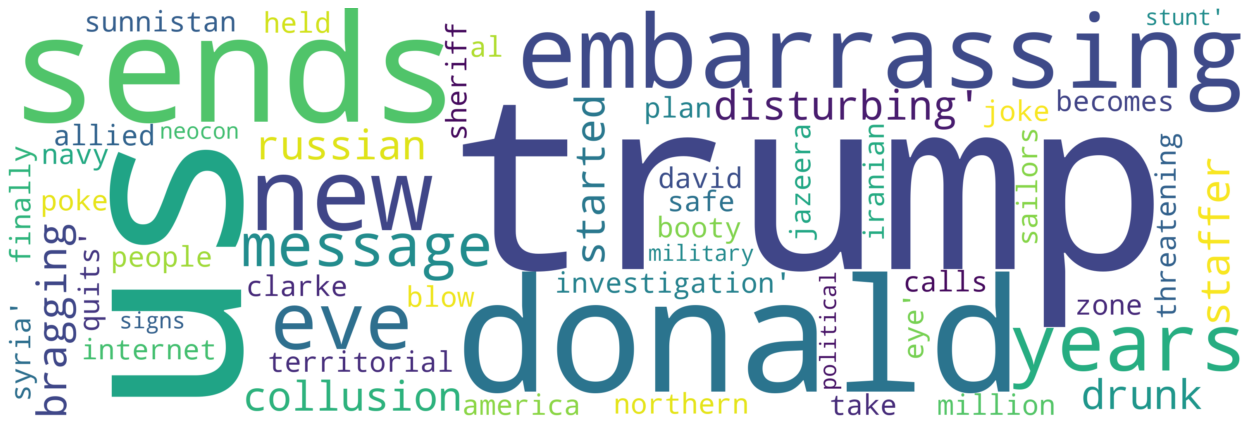

In [48]:
fake_titles_array = fake_data['title'].values

wordcloud = WordCloud(width=3000,height=1000, background_color = "white", ).generate(str(fake_titles_array))

figure(figsize=(20, 8), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.show()

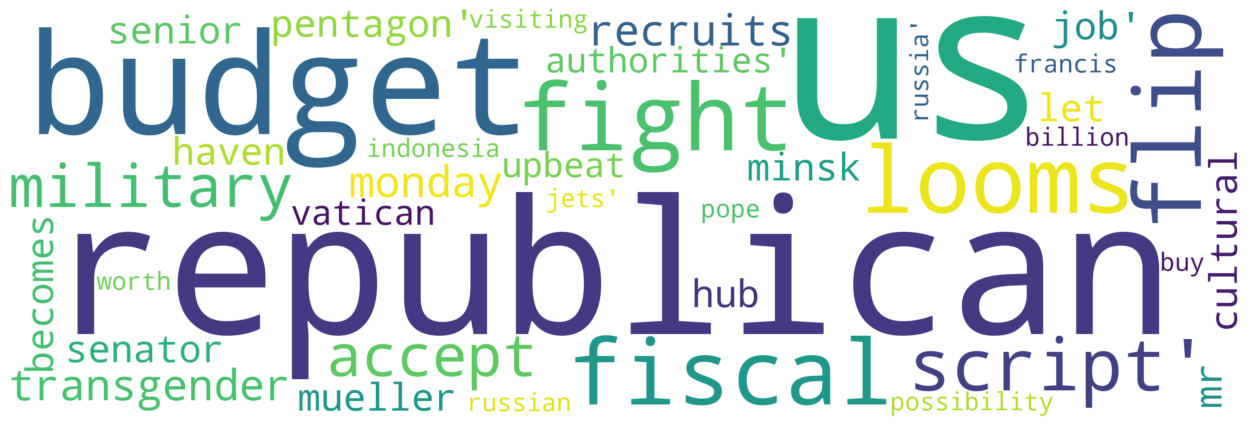

In [47]:
true_titles_array = true_data['title'].values

wordcloud = WordCloud(width=3000,height=1000, background_color = "white", ).generate(str(true_titles_array))

figure(figsize=(20, 8), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.show()

In [74]:
fake_titles_strlen = fake_data['title'].str.len()
fake_titles_strlen.head()
fake_titles_average_chars = fake_titles_strlen.mean()

fake_texts_strlen = fake_data['text'].str.len()
fake_texts_strlen.head()
fake_texts_average_chars = fake_texts_strlen.mean()

true_titles_strlen = true_data['title'].str.len()
true_titles_strlen.head()
true_titles_average_chars = true_titles_strlen.mean()

true_texts_strlen = true_data['text'].str.len()
true_texts_strlen.head()
true_texts_average_chars = true_texts_strlen.mean()

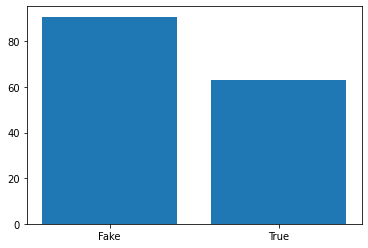

63.077601905028715


In [75]:
plt.bar(['Fake', 'True'],[fake_title_average_chars, true_titles_average_chars])
plt.show()
print(true_titles_average_chars)

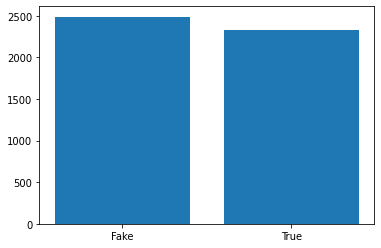

2324.2169771676704


In [76]:
plt.bar(['Fake', 'True'],[fake_texts_average_chars, true_texts_average_chars])
plt.show()
print(true_texts_average_chars)

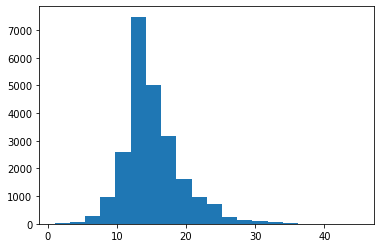

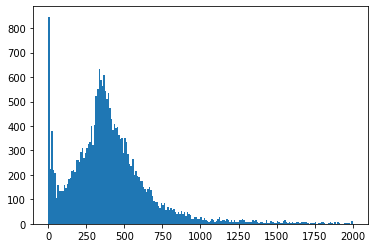

In [114]:
fake_titles_word_count = fake_data['title'].str.count(' ')+1
fake_titles_word_count.head()

plt.hist(fake_titles_word_count, bins=20)
plt.show()

fake_text_word_count = fake_data['text'].str.count(' ')+1
fake_text_word_count.head()

plt.hist(fake_text_word_count, bins=200, range=(0, 2000))
plt.show()

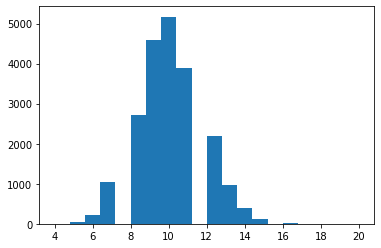

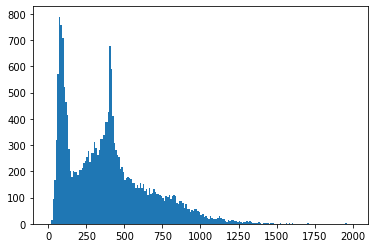

In [115]:
true_titles_word_count = true_data['title'].str.count(' ')+1
true_titles_word_count.head()

plt.hist(true_titles_word_count, bins=20)
plt.show()

true_text_word_count = true_data['text'].str.count(' ')+1
true_text_word_count.head()

plt.hist(true_text_word_count, bins=200, range=(0, 2000))
plt.show()

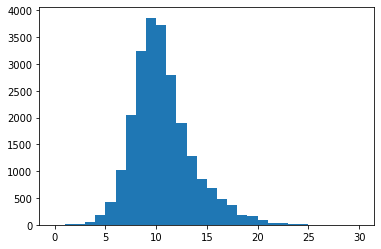

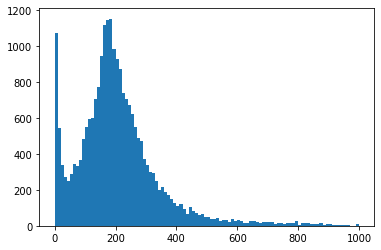

In [127]:
fake_data_no_stopwords = fake_data
fake_data_no_stopwords['title'] = fake_data_no_stopwords.title.apply(remove_stopwords)
fake_data_no_stopwords['text'] = fake_data_no_stopwords.text.apply(remove_stopwords)
fake_data_no_stopwords

fake_titles_word_count = fake_data_no_stopwords['title'].str.count(' ')+1
fake_titles_word_count.head()

plt.hist(fake_titles_word_count, bins=30, range=(0,30))
plt.show()

fake_text_word_count = fake_data_no_stopwords['text'].str.count(' ')+1
fake_text_word_count.head()

plt.hist(fake_text_word_count, bins=100, range=(0, 1000))
plt.show()

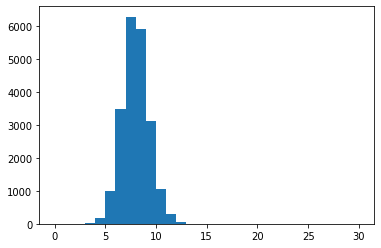

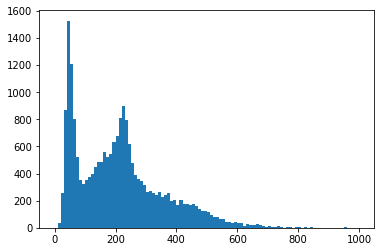

In [126]:
true_data_no_stopwords = true_data
true_data_no_stopwords['title'] = true_data_no_stopwords.title.apply(remove_stopwords)
true_data_no_stopwords['text'] = true_data_no_stopwords.text.apply(remove_stopwords)
true_data_no_stopwords

true_titles_word_count = true_data_no_stopwords['title'].str.count(' ')+1
true_titles_word_count.head()

plt.hist(true_titles_word_count, bins=30, range=(0,30))
plt.show()

true_text_word_count = true_data_no_stopwords['text'].str.count(' ')+1
true_text_word_count.head()

plt.hist(true_text_word_count, bins=100, range=(0, 1000))
plt.show()

In [142]:
count_vectorizer = CountVectorizer(ngram_range = (2,2))

test = count_vectorizer.fit_transform(["takis clever boy takis clever boy izambo clever girl", "takis clever boy"])

print(test)

  (0, 5)	2
  (0, 2)	2
  (0, 1)	1
  (0, 0)	1
  (0, 4)	1
  (0, 3)	1
  (1, 5)	1
  (1, 2)	1
